In [2]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Relationships Between Variables

One very iportant concept, especially for machine learning, is examining the relationship between two varaibles.
Take height and weight - as you look at taller people, they probably get heavier, but the relationship isn't exact. Danny DeVito is 4'8" and 194lb, NBA player Lonzo Ball is listed as 6'6" and 190lb! Clearly there's some variation in there.

We can analyze and measure the strength of these relationships of one varaible to another, and use that to better undertand our data, and do things like select varaibles for machine learning. 

A primary tool for examining these relationships is a scatter plot - one varaible on the X axis, the other on the Y, and a point for each value. The shape that all these points create will illustrate the relationship

# 变量之间的关系

一个非常重要的概念，特别是对于机器学习来说，就是研究两个变量之间的关系。
以身高和体重为例--当你看着高大的人时，他们可能会变得更重，但这种关系并不确切。丹尼-德维托身高4英尺8英寸，体重194磅，而NBA球员朗佐-鲍尔的身高是6英尺6英寸，体重190磅！显然，这里面有一些差异。很明显，这里面有一些变化。

我们可以分析和测量一个变量与另一个变量之间的这些关系的强度，并利用它来更好地理解我们的数据，并做一些事情，如为机器学习选择变量。

研究这些关系的一个主要工具是散点图--一个变量在X轴上，另一个在Y轴上，每个值有一个点。所有这些点所形成的形状将说明这种关系

In [3]:
#Load hieght weight data. 
df = pd.read_csv("data/cardio_train.csv", sep=";")
df.describe().T

count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

In [4]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [5]:
#Change the days into years, so it is more understandable#把天数改成年数，这样就更容易理解了
df["age"] = round(df["age"]/365, 0)
df.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


### Scatterplots

Scatterplots show one numerical varaible vs another, and we can see relationships between the two easily. 

###散点图

散点图显示了一个数字变量与另一个数字变量的对比，我们可以很容易地看到两者之间的关系。

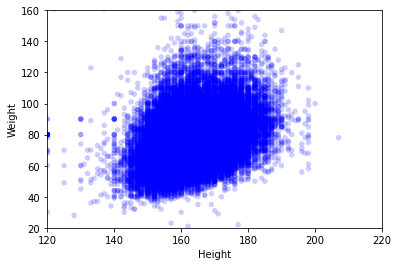

<Figure size 576x432 with 0 Axes>

In [7]:
#Create a scatterplot. Note scatterplots don't really need a preceeding object like a hist, it is just mapping points on a plot.
#创建一个散点图。注意散点图并不真正需要像hist那样的前置对象，它只是在一个图上映射点。
thinkplot.Scatter(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

##### Jitter  抖动图

As people get taller, they get heavier. It isn't an extremely clear relationship though. When we are looking mainly at the relationship between two variables, and not so much at the exact values, we can do one (admittedly odd) thing to help our visualization - add random jitter to the points. 

The jitter paramater moves each point some randomized small amount, not enough to change the pattern of the data, but enough to remove small clusters. If we compare to the above version we no longer have groupings on each inch of height. This may help us see patterns more clearly, if so, we can add it. 

##### Jitter 抖动图

随着人们越来越高，他们也越来越重。不过这并不是一个极其明确的关系。当我们主要看两个变量之间的关系，而不是看确切的数值时，我们可以做一件事（公认的奇怪的事）来帮助我们的可视化--在点上添加随机抖动。

抖动参数使每个点随机地小幅度移动，不足以改变数据的模式，但足以消除小的群集。如果我们与上面的版本相比，我们在每英寸的高度上不再有分组。这可能有助于我们更清楚地看到模式，如果是这样，我们可以添加它。

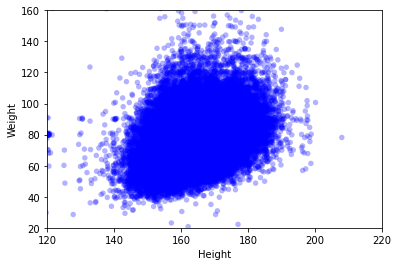

<Figure size 576x432 with 0 Axes>

In [8]:
#Add jitter
thinkplot.Scatter(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]), alpha=.3)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

##### Hexbins六边形

Another technique that can potentially make our scatter plots more clear is binning. Just like with regular binning, we are going to put our numeric varaiables into bins - this time it will be in two dimensions, each section of the 2D scatterplot is a 2D bin. 

This is another technique that can sometimes be usefull, in particular it can help us more clearly see when data is clustered around a few points. 
另一种有可能使我们的散点图更清晰的技术是分档。就像普通的分档一样，我们要把我们的数字变量放入分档中--这次将是二维的，二维散点图的每个部分就是一个二维分档。

这是另一种有时很有用的技术，特别是它可以帮助我们更清楚地看到数据在几个点周围聚集的情况。

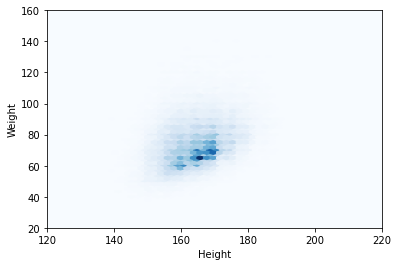

<Figure size 576x432 with 0 Axes>

In [9]:
#Hexbin
thinkplot.HexBin(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]))
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

### Relationships and Correlation

All of these visualizations show the same basic thing - the relationship between height and weight. 

We can measure the strength of that relationship, that's called correlation. Correlation is how closely changes in variable X are seen in changes in variable Y. 

Correlation is a value between -1 and 1:
<ul>
<li> Correlation is 1 (or close): Everytime X increases, Y increases by a proportionate amount. 1 is perfectly (positively) correlated. 
<li> Correlation is -1 (or close): Everytime X increases, Y decreases by a proportionate amount. -1 is perfectly negatively correlated. 
<li> Correlation is 0 (or close): Changes in X indicate nothing about the value of Y. 0 is no correlation. 
<li> Otherwise: Most relationships we care about will have correlations in between 0 and -1 or +1. This indicates that there is some connection between the two variables (which helps us use one to predict the other), but that relationship isn't absolute. 
</ul>
### 关系和相关性

所有这些可视化都显示了相同的基本内容——身高和体重之间的关系。

我们可以衡量这种关系的强度，这就是所谓的相关性。相关性是变量 X 的变化与变量 Y 的变化之间的密切程度。

相关性是介于 -1 和 1 之间的值：
<ul>
<li> 相关性为 1（或接近）：每当 X 增加时，Y 都会按比例增加。 1 完全（正）相关。
<li> 相关性为 -1（或接近）：每当 X 增加时，Y 都会按比例减少。 -1 完全负相关。
<li> 相关性为 0（或接近）：X 的变化与 Y 的值无关。0 表示没有相关性。
<li> 否则：我们关心的大多数关系的相关性都在 0 到 -1 或 +1 之间。这表明这两个变量之间存在某种联系（这有助于我们使用一个来预测另一个），但这种关系并不是绝对的。
</ul>


In [10]:
#Calculate both correlation metrics#计算两个相关指标
a=df["height"].values.tolist()
b=df["weight"].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)
#a,b

(0.2909678349914984, 0.3135692698998496)

ataFrame.corr(method='pearson', min_periods=1)

参数说明：

method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}

               pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性数据便会有误差。

                kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正太分布的数据

                spearman：非线性的，非正太分布的数据的相关系数

min_periods：样本最少的数据量

返回值：各类型之间的相关系数DataFrame表格。
————————————————
版权声明：本文为CSDN博主「walking_visitor」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/walking_visitor/article/details/85128461

#### Pairplots
配对图

The pairplot is a very helpful tool when looking at distributions and correlations of several variables in a dataset all at once. 
当同时查看数据集中多个变量的分布和相关性时，pairplot 是一个非常有用的工具

In [11]:
#Cut down data to only numeric values, and fliter out some outliers. #将数据缩减为仅数值，并过滤掉一些异常值。
df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

In [12]:
temp_df = df2.sample(10000)
# 取10000个随机的例子

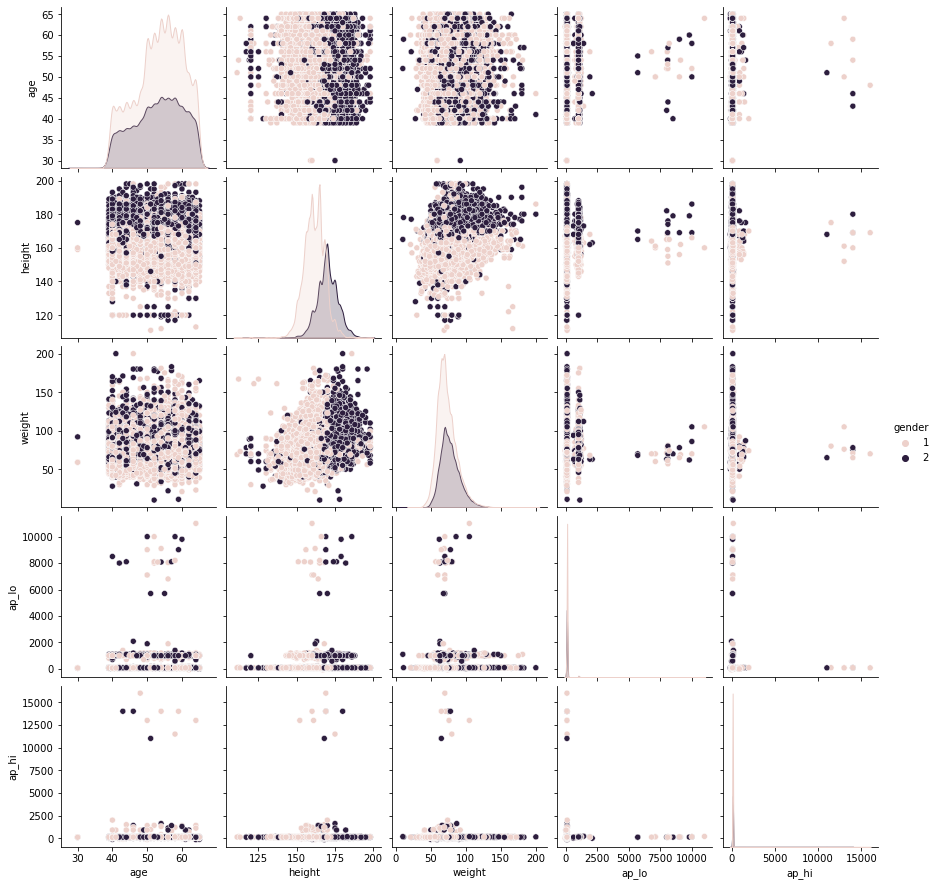

In [13]:
#Generate pairplot
sns.pairplot(df2, dropna=True, hue="gender") #去掉性别
plt.show()

#### Regression Plot

A regression plot can automatically produce an indicator of the relationship between X and Y. 

#### 回归图

回归图可以自动生成 X 和 Y 之间关系的指标。


<AxesSubplot:xlabel='height', ylabel='weight'>

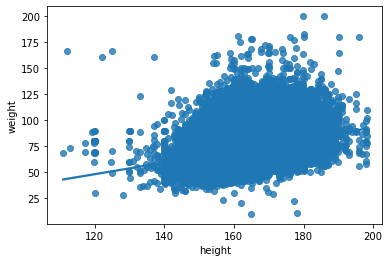

In [14]:
#Generate regression plot (pretty scatterplot with regression)#生成回归图（带有回归的漂亮散点图）
sns.regplot(x=df2["height"], y=df2["weight"], robust=True, data=df2, n_boot=1000, x_jitter=.2, y_jitter=.2, ci=85) #ci控制那条线的

## Example 2

We can now load some different data, do some data cleanup, and look at correlations a bit more. 


## 示例 2
我们现在可以加载一些不同的数据，进行一些数据清理，并更多地查看相关性

In [15]:
#Load drug dataset and drop some values, so the total volume of data is manageable.
#加载药物数据集并删除一些值，因此数据总量是可控的。 
drg = pd.read_csv("data/drug-use-by-age.csv")
drg = drg.drop(columns=["n", 'alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency',
    'pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency', 'pain-releiver-use', 'stimulant-use'])
drg.head()

age  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0  12          3.9            1.1          0.1        0.0         0.1   
1  13          8.5            3.4          0.1        0.0         0.0   
2  14         18.1            8.7          0.1        0.0         0.1   
3  15         29.2           14.5          0.5        0.1         0.2   
4  16         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  oxycontin-use  tranquilizer-use  meth-use  \
0               0.2           1.6            0.1               0.2       0.0   
1               0.6           2.5            0.1               0.3       0.1   
2               1.6           2.6            0.4               0.9       0.1   
3               2.1           2.5            0.8               2.0       0.3   
4               3.4           3.0            1.1               2.4       0.3   

   sedative-use  
0           0.2  
1           0.1  
2           0.2  
3           0.4  
4           0.2

#### Pariplots++

Pairplots can also have the regression line displayed en masse with a simple argument. The shaded area represents the error (more on that in a couple of weeks) of the regression line, the higher the correlation, the tighter the shaded area is to the line. In other words, the less error there is, the better the model (regression line) is at modelling (representing), the emperical data (the dots). 
配对图还可以通过一个简单的参数整体显示回归线。阴影区域表示回归线的误差（在几周内会更多），相关性越高，阴影区域与线越紧密。换句话说，误差越小，模型（回归线）在建模（表示）、经验数据（点）方面的效果就越好。
Add in <i>kind="reg"</i> as an argument in the pairplot to add in the regression part. 配对图中要添加到回归部分的参数。

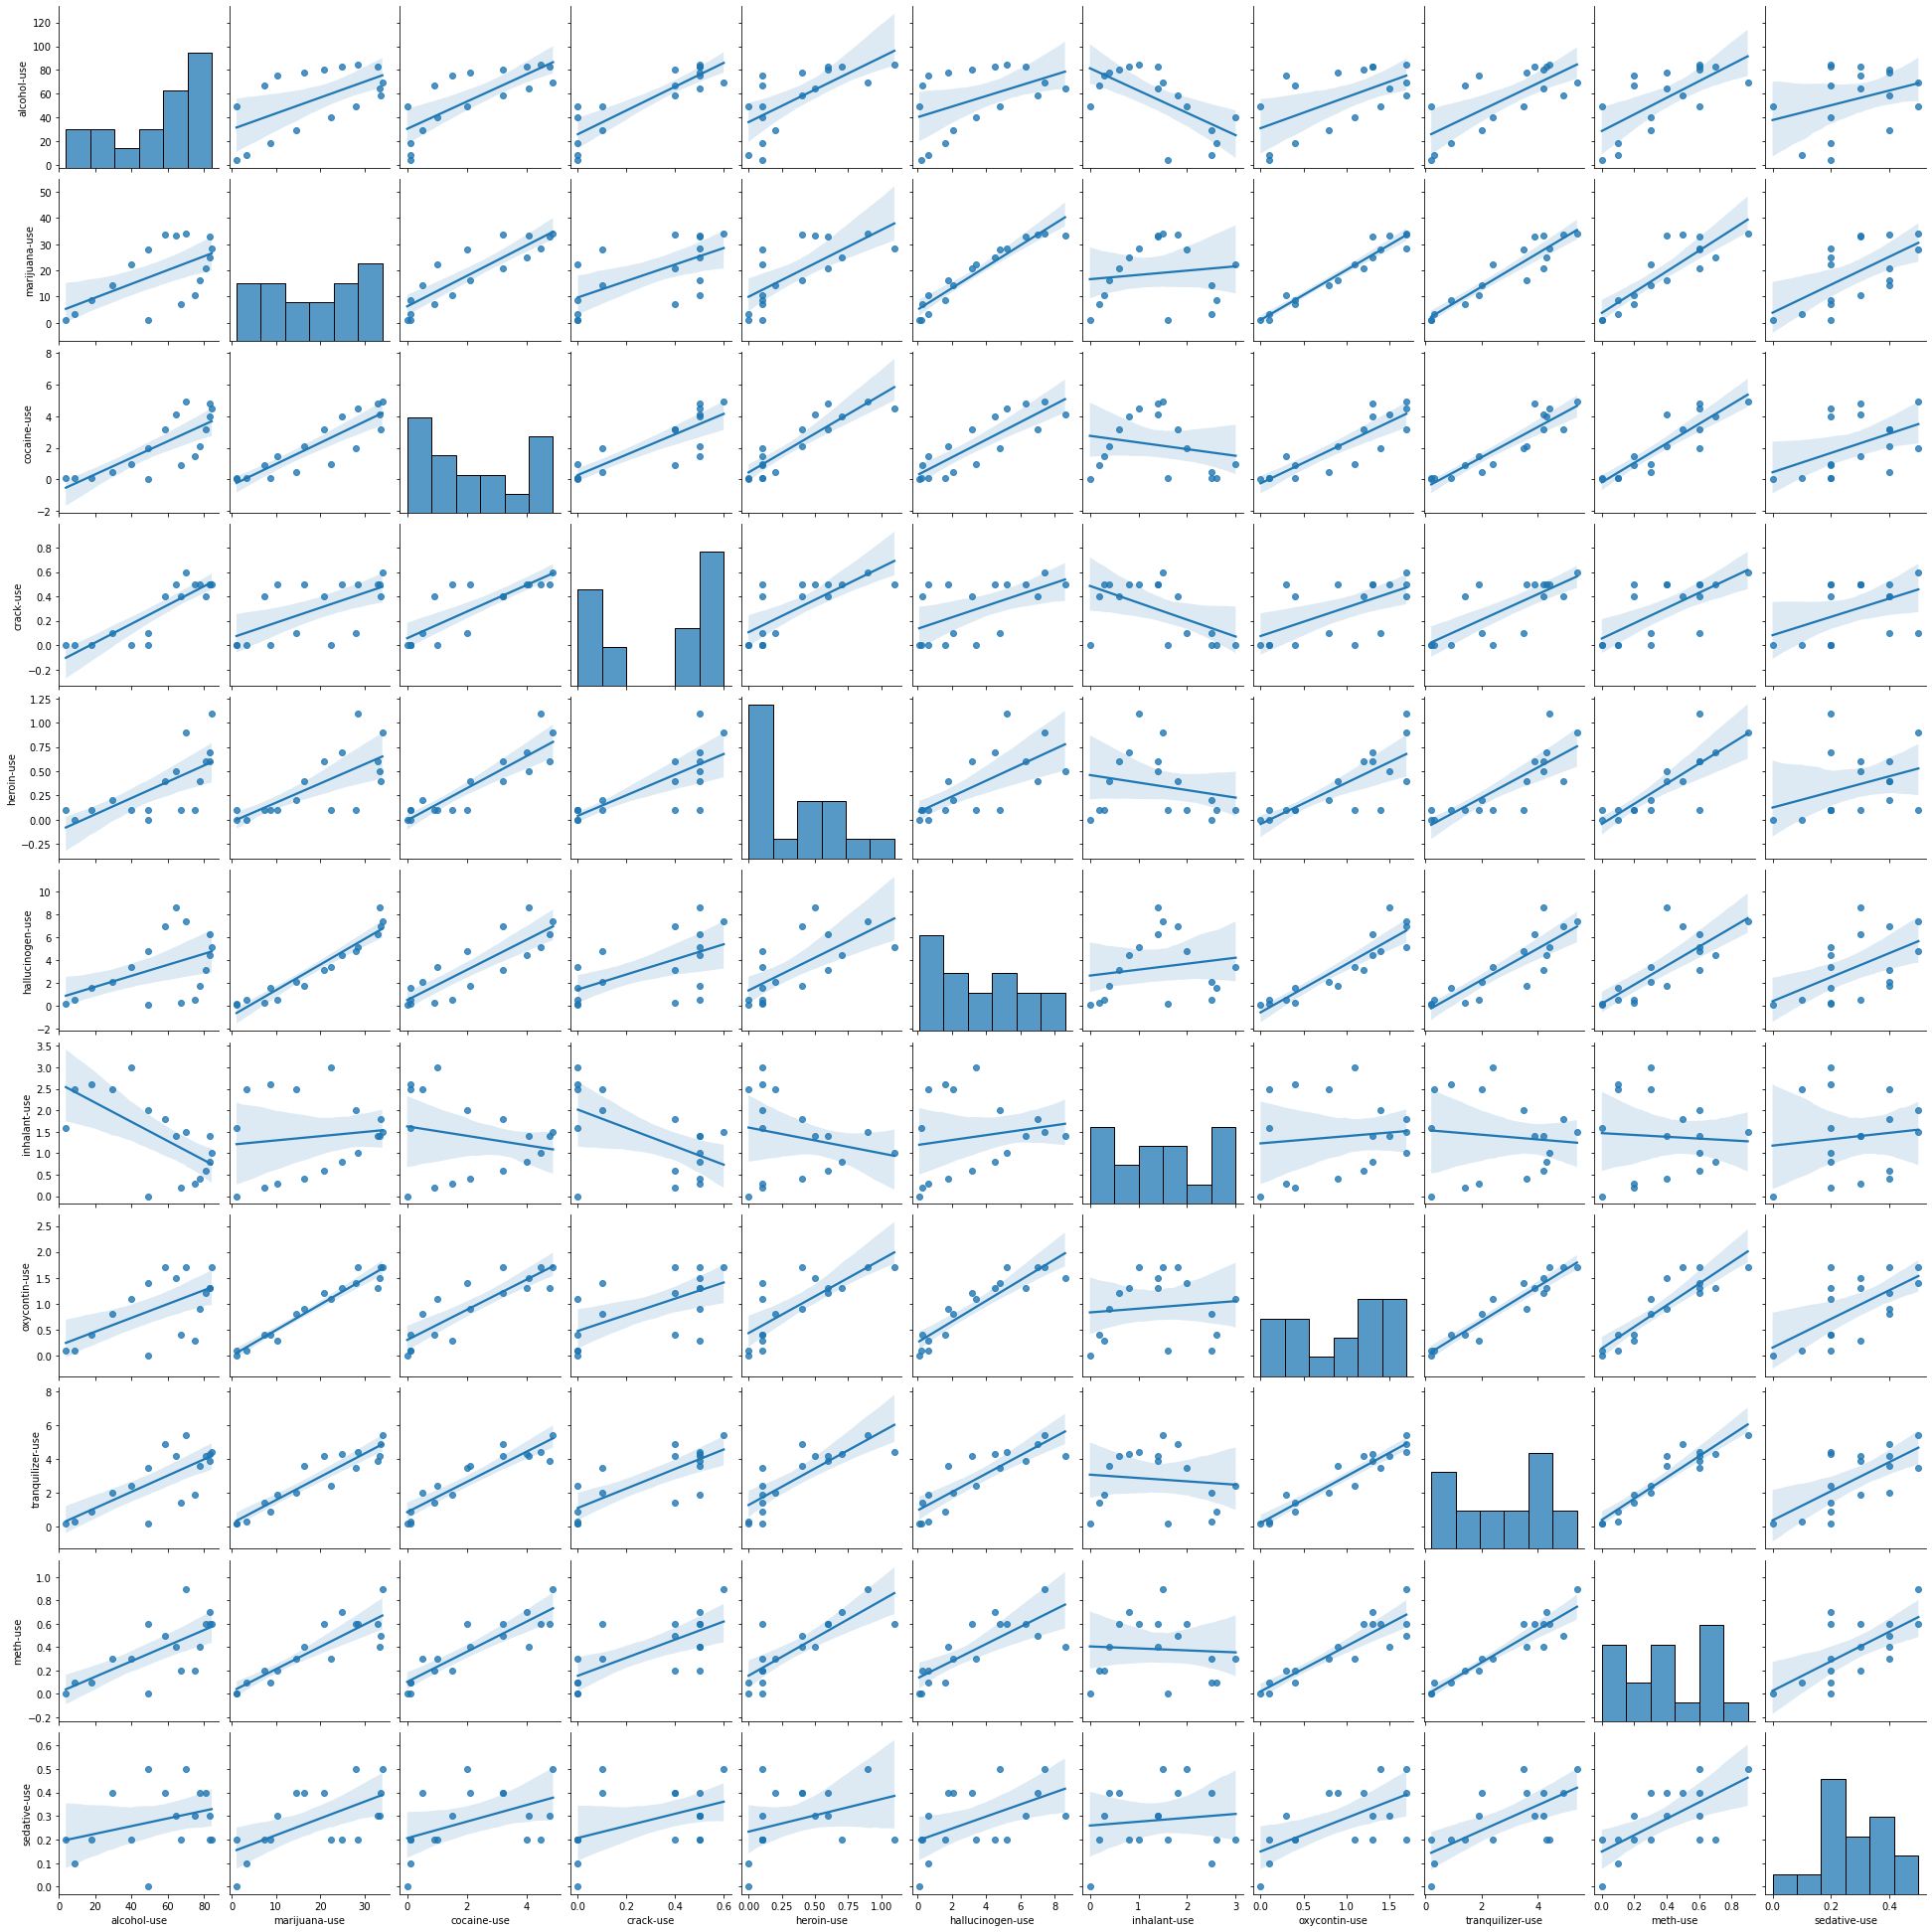

In [16]:
#Generate pairplot
sns.pairplot(drg, dropna=True, kind="reg")
plt.show()

#### Generate Correlation Tables
#### 生成相关表

In [17]:
#Take the data in our dataframe, and change it into a set of correlations. #取我们数据框架中的数据，并将其改为一组相关关系。
drg2 = drg.apply(pd.to_numeric, errors='coerce')
drg2 = drg2.drop(columns=["age"])
drg2 = drg2.corr()
drg2.head()

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
alcohol-use       1.000000       0.594165     0.773458   0.877378    0.677614   
marijuana-use     0.594165       1.000000     0.883789   0.620670    0.711613   
cocaine-use       0.773458       0.883789     1.000000   0.835727    0.899944   
crack-use         0.877378       0.620670     0.835727   1.000000    0.750790   
heroin-use        0.677614       0.711613     0.899944   0.750790    1.000000   

               hallucinogen-use  inhalant-use  oxycontin-use  \
alcohol-use            0.463702     -0.648248       0.589219   
marijuana-use          0.959353      0.127336       0.971733   
cocaine-use            0.855668     -0.214609       0.865626   
crack-use              0.556222     -0.543499       0.603003   
heroin-use             0.683674     -0.215961       0.775321   

               tranquilizer-use  meth-use  sedative-use  
alcohol-use            0.735785  0.682531      0.318268  
marijuana-use          0.935199  0.870446      0.616766  
cocaine-use            0.920430  0.889353      0.461914  
crack-use              0.772651  0.694324      0.438421  
heroin-use             0.818583  0.816620      0.333649

#### Heatmaps and Correlation#### 热图和关联性

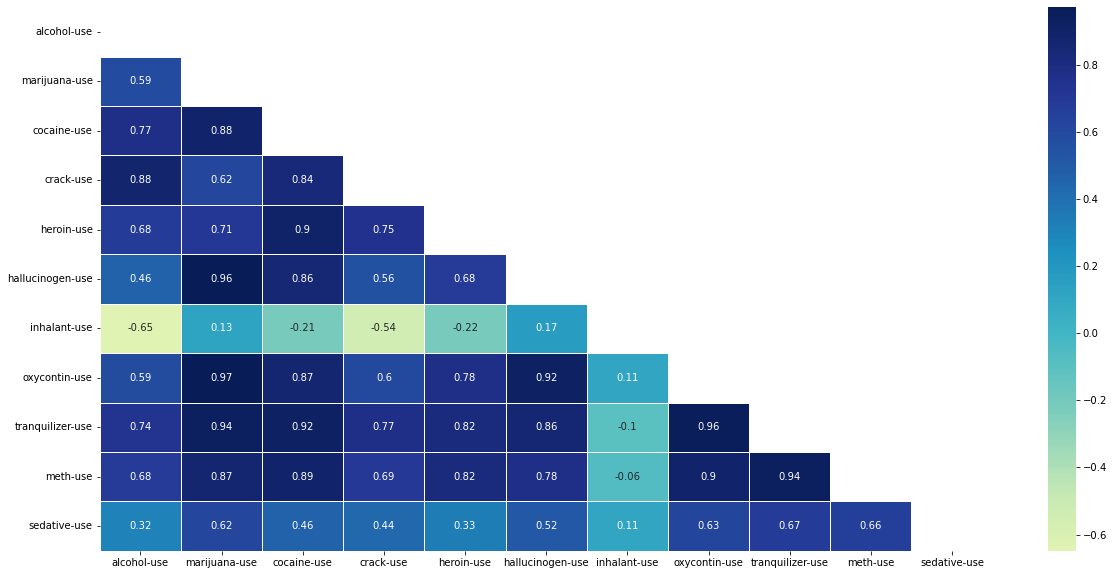

In [18]:
#Show Correlations in heatmap#在热图中显示相关关系
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(drg2, dtype=bool)) #去掉热力图上半部分
sns.heatmap(drg2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Exercise

We can use our newfound correlation skills to look at something near and dear to my heart - diabetes!

In this data we have a bunch of common values that are tracked for diabetic people, the Outcome varaible is a measure of if that person has diabetes. 

＃＃ 锻炼

我们可以使用我们新发现的相关技能来观察我最关心的东西——糖尿病！

在此数据中，我们有一组针对糖尿病人跟踪的常见值，结果变量是衡量该人是否患有糖尿病的指标。

#### Part 1; Load and Explore Data

Load some data and take a preview. Look for correlations visually and calculate some that appear to be correlated numerically. 


＃＃＃＃ 第1部分;加载和探索数据

加载一些数据并进行预览。直观地寻找相关性并计算一些似乎在数字上相关的相关性。

In [19]:
#Read Diabetic Data and change to mmol/L, ditch 0 glucose (errors)#读取糖尿病数据并改成mmol/L，沟0葡萄糖（错误）。
d = pd.read_csv("data/diabetes.csv")
d["Glucose"] = d["Glucose"]/18.018
d = d[d["Glucose"] > 0]
d.head()

Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6   8.214008             72             35        0  33.6   
1            1   4.717505             66             29        0  26.6   
2            8  10.156510             64              0        0  23.3   
3            1   4.939505             66             23       94  28.1   
4            0   7.603508             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [20]:
#Describe data#描述数据
d.describe(include="all")

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   763.000000  763.000000     763.000000     763.000000  763.000000   
mean      3.851900    6.753622      69.115334      20.477064   80.292267   
std       3.374729    1.694730      19.399240      15.973171  115.457448   
min       0.000000    2.442002       0.000000       0.000000    0.000000   
25%       1.000000    5.494505      62.000000       0.000000    0.000000   
50%       3.000000    6.493506      72.000000      23.000000   36.000000   
75%       6.000000    7.825508      80.000000      32.000000  128.500000   
max      17.000000   11.044511     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  763.000000                763.000000  763.000000  763.000000  
mean    31.986763                  0.472477   33.271298    0.348624  
std      7.893221                  0.331963   11.772161    0.476847  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243500   24.000000    0.000000  
50%     32.000000                  0.374000   29.000000    0.000000  
75%     36.550000                  0.626500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

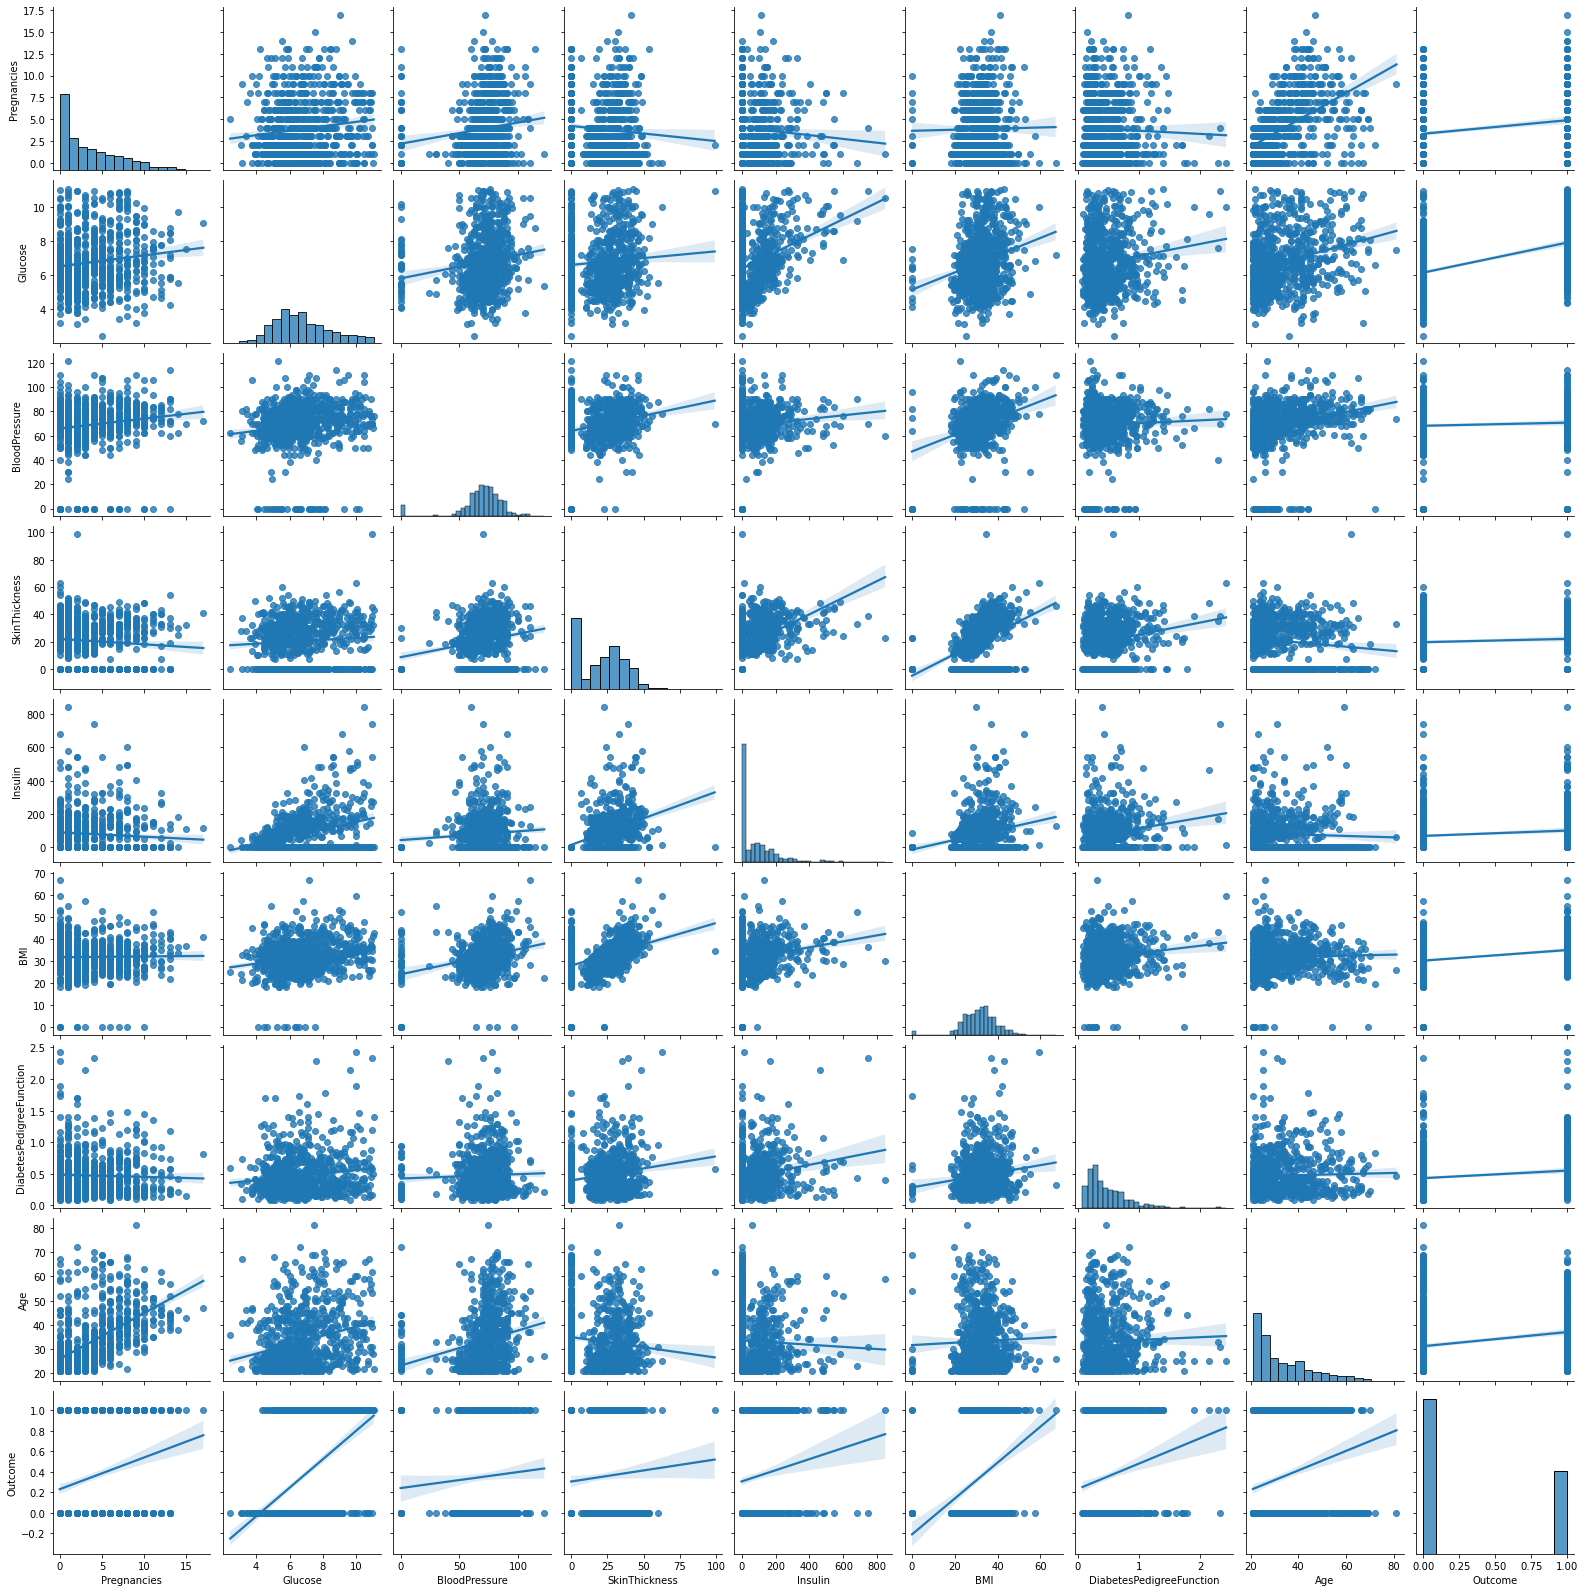

In [21]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg")
plt.show()

In [22]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d["BMI"], d["SkinThickness"]), thinkstats2.SpearmanCorr(d["BMI"], d["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

BMI-SkinThickness: 0.3915418904645855 0.44152005708796255
Glucose-Insulin: 0.3315502520494515 0.20834359330446126
Glucose-BP: 0.15842934449388998 0.23540832428307323


#### Part 2: Refine and Clean Data

Remove any outliers in the data that aren't useful, then refine our examination. This time, add: hue="Outcome" as an argument in the pairplot. 

One thing jumped out there - there are several things with 0 or near 0 values that don't make sense, e.g. Blood Pressure. 

#### 第2部分：细化和清理数据

删除数据中任何没有用的异常值，然后细化我们的检查。这一次，在pairplot中添加：hue="Outcome "作为参数。

有一件事跳出来了--有几个数值为0或接近0的东西是没有意义的，比如说血压。

In [23]:
#Filter out 0s. Rerun graphs. #过滤掉0s。重新运行图形。
d = d[d["BloodPressure"] > 0]
d = d[d["SkinThickness"] > 0]
d = d[d["BMI"] > 0]

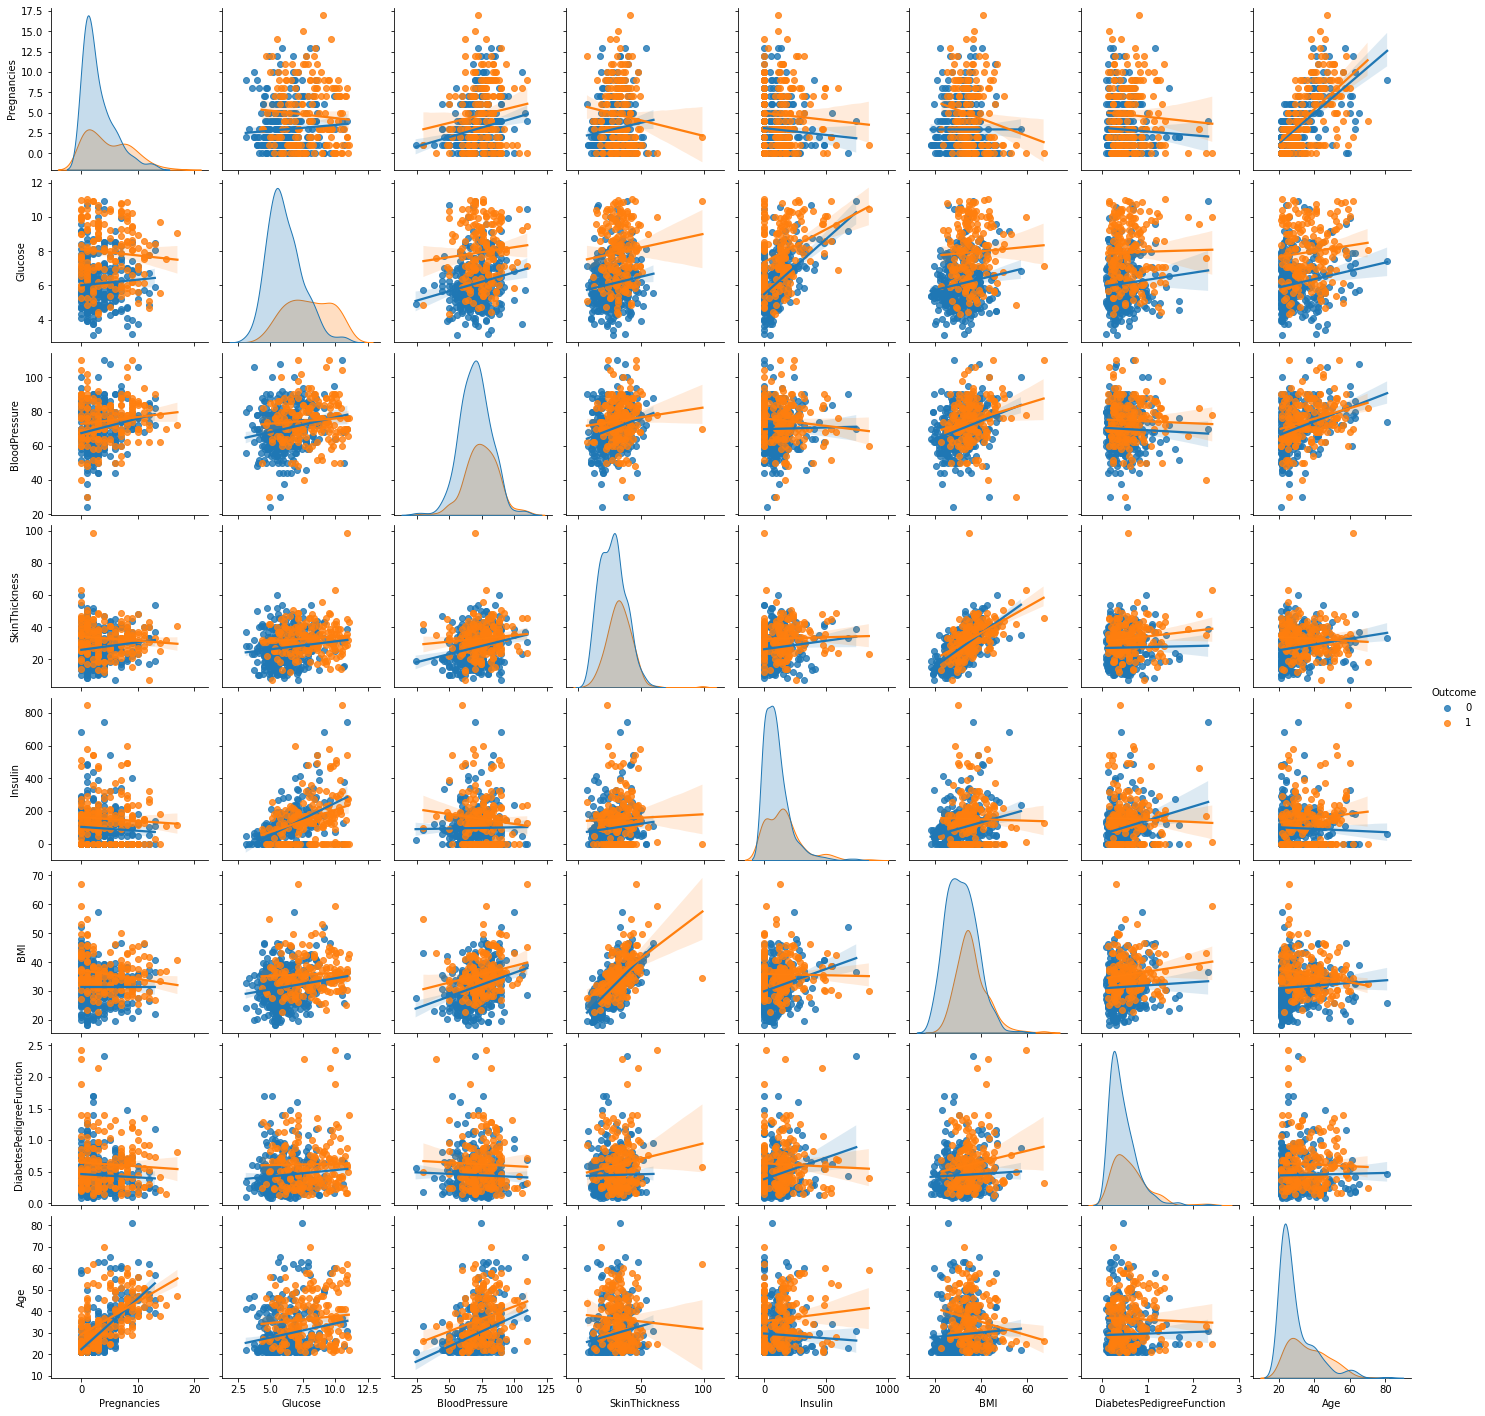

In [24]:
#Look for correlations visually#在视觉上寻找关联性
sns.pairplot(d, dropna=True, kind="reg", hue="Outcome")
plt.show()

#### Pairplot Findings

There are a lot of preliminary conclusions that we can draw from the data graph above. Some things that I can see are:
<ul>
<li> Crack use distribution - crack consumption seems to be bimodal (it has two peaks - or modes). People either do a lot of crack, or near 0 crack. There seems to be very few moderate crack users. 
<li> Cannabis and hallucinogenics are very highly correlated. This means that as someone smokes more weed, they also tend to do more hallucinogens - and vice versa. One is a good "predictor" of the other. 
<li> Inhalents look to be less correlated with other drug uses than the others. This means that other drug usage tends to be a poor indicator of inhalent usage, they aren't tied (correlated) to each other. For example, knowing someone does meth gives you virtually no information about their inhalent use. On the other hand, knowing someone's meth consumption gives a good idea of their use of tranquilizers, as those two have a strong correlation. 
</ul>

Are there any other things that we can learn from the plot?
#### 配对图发现

我们可以从上面的数据图中得出很多初步的结论。我可以看到的一些事情是：
<ul>
<li> 裂纹使用分布 - 裂纹消耗似乎是双峰的（它有两个峰值 - 或模式）。人们要么做很多破解，要么接近0破解。似乎很少有中度破解用户。
<li> 大麻和致幻剂的相关性非常高。这意味着当某人吸食更多杂草时，他们也倾向于使用更多致幻剂——反之亦然。一个是另一个很好的“预测器”。
<li> 吸入剂与其他药物使用的相关性似乎低于其他药物。这意味着其他药物的使用往往是吸入使用的不良指标，它们彼此没有联系（相关）。例如，知道某人吸食冰毒几乎不会让您了解他们的吸入使用情况。另一方面，了解某人的甲基苯丙胺消费情况可以很好地了解他们使用镇静剂的情况，因为这两者具有很强的相关性。
</ul>

我们还能从剧情中学到什么其他的东西吗？

#### Part 3: Examine Distribution of Glucose (Target)

That cleans up our data a little. Since this data is about a glucose test, we can detour to examine glucose more closely...

#### 第三部分：检查葡萄糖的分布（目标）。

这样就把我们的数据清理了一下。由于这个数据是关于葡萄糖测试的，我们可以绕道更仔细地检查葡萄糖...

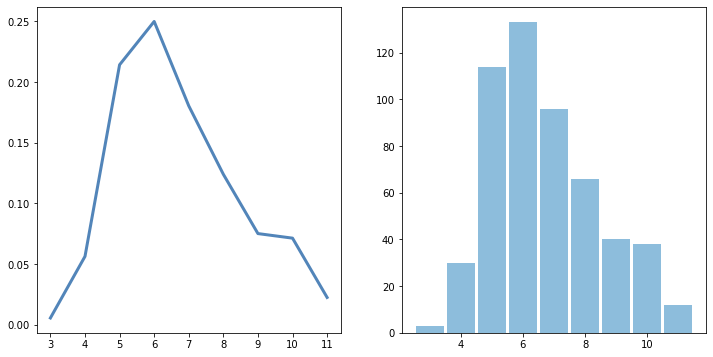

In [25]:
#Look at glucose overall first. 
thinkplot.PrePlot(2,1,2)
pmf = thinkstats2.Pmf(round(d["Glucose"], 0))
thinkplot.Pdf(pmf)
thinkplot.SubPlot(2)
hist = thinkstats2.Hist(round(d["Glucose"],0))
thinkplot.Hist(hist)
thinkplot.Config()

##### Split Data

Since we are looking at diabetes, it likely makes sense to explore if there is any notable difference between diabetics and non-diabetics. We can use the "col" argument here to auto-split our data to take a quick look at if there is a difference here. 

In the split pairplot above we saw that the glucose looks to be the "most different" between the two groups. 

<b>Note:</b> Here I am using the built in splitting in the graph that comes with the "col" argument. I split the data into separate dataframes below. 
##### 拆分数据

由于我们正在研究糖尿病，因此探索糖尿病患者和非糖尿病患者之间是否存在显着差异可能是有意义的。我们可以在这里使用“col”参数来自动拆分我们的数据，以便快速查看这里是否存在差异。

在上面的分割配对图中，我们看到葡萄糖看起来是两组之间“最不同的”。

<b>注意：</b> 这里我使用的是“col”参数附带的图表中的内置拆分。我将数据拆分为下面的单独数据框。

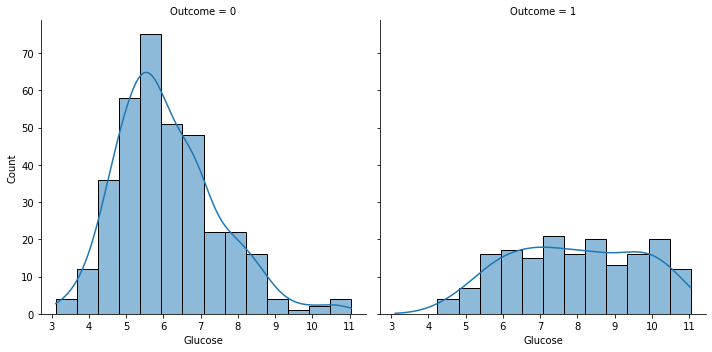

In [26]:
#Split by if you're diabetic or not. 
#NOTE THIS ONE USES A NEW SNS FUNCTION. IT MAY NOT WORK FOR YOU. USE DISTPLOT LIKE THE PREVIOUS EXAMPLE AND ADAPT IT
#OR USE THINKPLOT LIKE ABOVE. THIS DEPENDS ON THE VERSION OF SEABORN THAT IS INSTALLED ON YOUR COMPUTER, NOT ANYTHING YOU'VE DONE.
#按你是否患有糖尿病来划分。
#注意这个使用了一个新的sns函数。它可能不适合你。使用distplot，就像前面的例子一样，并对其进行调整。
#或者像上面那样使用thinkplot。这取决于你电脑上安装的seaborn版本，而不是你做过的任何事情。
sns.displot(data=d, x="Glucose", kde=True, col="Outcome")

#### Results

It looks like there is a pretty clear difference between the glucose readings for diabetics and non-diabetics. We can explore each on its own. 

＃＃＃＃ 结果

看起来糖尿病患者和非糖尿病患者的葡萄糖读数之间存在非常明显的差异。我们可以单独探索每一个

#### Part 4: Build Analytical Distribution

Take non diabetic people and create analytical distribution for them. 

Whoa! Way different. Diabetic people are in shambles and normal people are... well... normal. We can take our normal people and treat them as normal - quick detour into analytical distributions....

#### 第 4 部分：构建分析分布

选择非糖尿病患者并为他们创建分析分布。

哇！方式不同。糖尿病人一团糟，正常人……嗯……正常。我们可以把我们的正常人当作正常人对待——快速绕道分析分布......

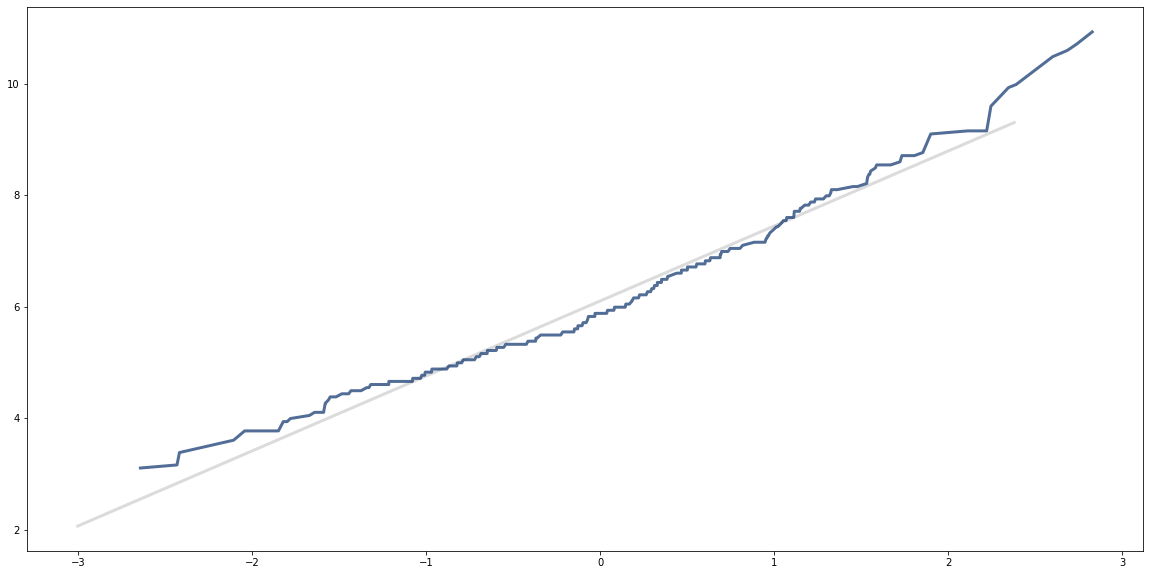

In [27]:
#Non-Diabetic people are normal!#非糖尿病人正常！
d_neg = d[d["Outcome"]==0]
thinkstats2.NormalProbabilityPlot(d_neg["Glucose"])

The normal probability plot looks pretty good. Why don't we make an analytical distribution out of our data?
正态概率图看起来不错。为什么我们不从我们的数据中进行分析分布呢？

In [28]:
#Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std())
#Print some stats... Note mean and median. 
norm.cdf(6), norm.median(), norm.mean()

(0.4686761767496125, 6.105944134113151, 6.105944134113151)

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


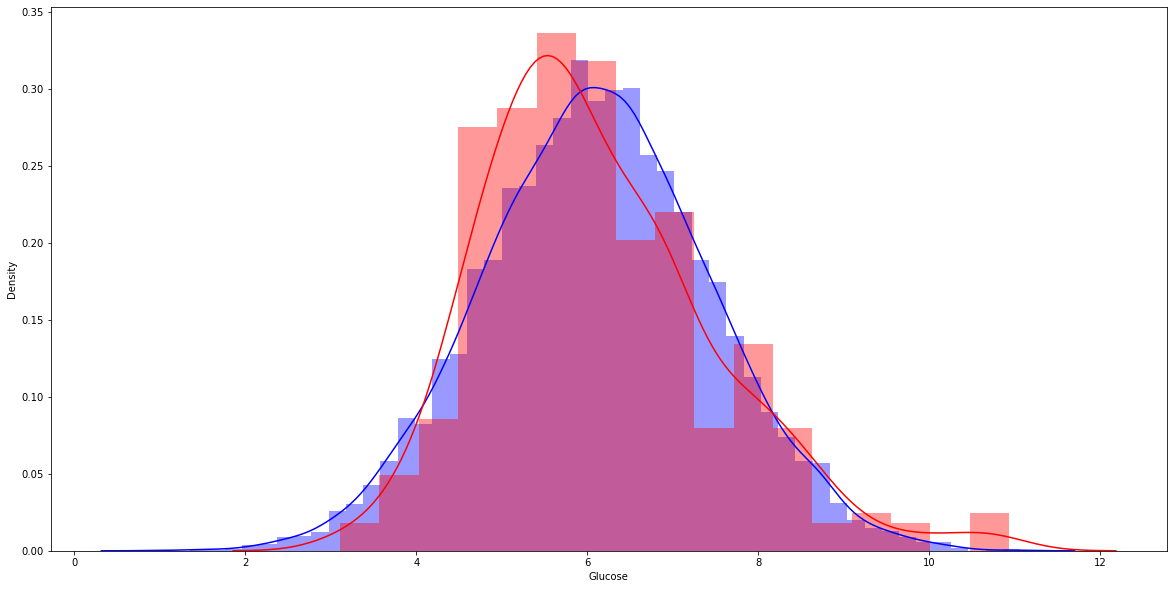

In [29]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue")
sns.distplot(d_neg["Glucose"], color="red")
plt.show()

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


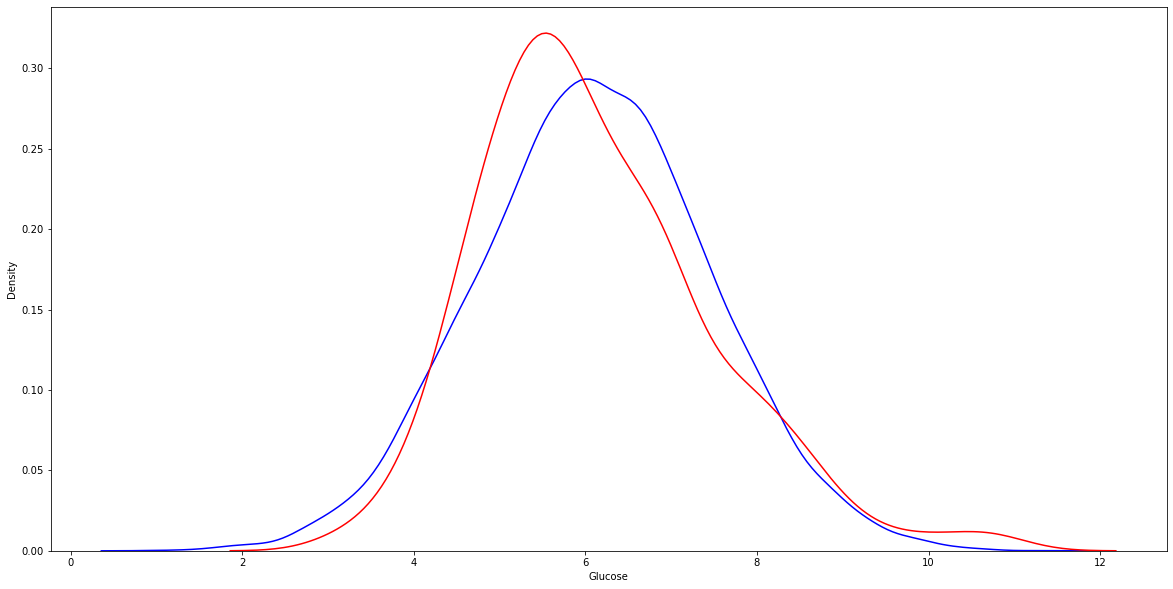

In [30]:
sns.distplot(norm.rvs(size=10000), color="blue", hist=False)
sns.distplot(d_neg["Glucose"], color="red", hist=False)
plt.show()

By doing what we just did there, we effectively said - this is the distribution of glucose for non-diabetics, it is defined by this formula. The "ss.norm..." generates that formula if you provide mean and std. We can use that new analytical model to do stuff, like graph....

What may be concerning about that...?
通过刚才的操作，我们实际上是在说--这就是非糖尿病患者的葡萄糖分布，它是由这个公式定义的。如果你提供平均值和标准差，"ss.norm... "就会生成这个公式。我们可以用这个新的分析模型来做一些事情，比如图形....。

这有什么值得注意的呢...？

Part 5: More Analytical Distributions

Our distribution is more or less normal, but not perfect. Maybe we should consider the skew, and try to make it more accurate?

#### Skewnorm Distribution

Our data appears to be skewed, perhaps we can model it with a skewnorm distribution. This is another one that comes from scipy. For the normal distribution we needed the mean and standard devitation as the inputs to create an analytical distribution. Here we need to add one more, the skew. Luckily we can calculate it via our trusty functions. 

![Skewnorm](images/skewnorm.png "Skew Normal")

<b>Note:</b> this distribution could also probably be represented pretty well with a log-normal distribution. The skewed normal distribution is very similar, we'll play with it here. In reality, I suspect that each could model this ditribution in a pretty similar way. 

第 5 部分：更多分析分布

我们的分布或多或少是正常的，但并不完美。也许我们应该考虑偏斜，并尝试使其更准确？

#### 偏态分布

我们的数据似乎是偏斜的，也许我们可以用偏态分布对其进行建模。这是另一个来自 scipy 的。对于正态分布，我们需要均值和标准差作为输入来创建分析分布。在这里，我们需要再添加一个，倾斜。幸运的是，我们可以通过我们可信赖的函数来计算它。

![Skewnorm](images/skewnorm.png "偏斜法线")

<b>注意：</b> 这种分布也可以用对数正态分布很好地表示。偏态正态分布非常相似，我们将在这里使用它。实际上，我怀疑每个人都可以以非常相似的方式对这种分布进行建模。

#### Skew-Stylez and Parametric    Skew-Stylez 和参数化


One thing to note here is the skew calculation. We looked at a couple - Pearson and Spearman. The details of skew calculations is well beyond the level of detail we have to care about here, but long-story-short, there are several calculations of skew: https://en.wikipedia.org/wiki/Skewness. The Pearson Median Skew is one that attempts to be "non-parametric", or one that does not make assumptions about the distribution of the underlying data. Below, we can calculate it along with "regular" skew. This is another example of the usefullness of normality, the other skew calculations lean on assumptions of the normality of the data - from the wikipedia page, "Under the assumption that the underlying random variable {\displaystyle X}X is normally distributed...".这里要注意的一件事是偏斜计算。我们看了一对夫妇——皮尔逊和斯皮尔曼。偏斜计算的细节远远超出了我们在这里必须关心的详细程度，但长话短说，有几种偏斜计算：https://en.wikipedia.org/wiki/Skewness。 Pearson 中位数偏斜是一种尝试“非参数化”的方法，或者一种不对基础数据的分布做出假设的方法。下面，我们可以将其与“常规”偏斜一起计算。这是正态性有用性的另一个例子，其他偏斜计算依赖于数据正态性的假设 - 来自维基百科页面，“假设基础随机变量 {\displaystyle X}X 是正态分布的...... ”。

The parametric vs non-parametric idea is one that will stick with us. If we can assume that the data matches a distribution (usually normal) closely enough, then we can use things "built upon" that assumption - like some skew calculation. If it doesn't match that distribution, we need a different approach. There's a trade-off between durability (the ability to be used on any dataset), and suitability (the ability to tailor the results to our exact example). 参数与非参数的想法是我们坚持的想法。如果我们可以假设数据与分布（通常是正态的）足够接近，那么我们可以使用“建立在”该假设之上的东西——比如一些偏斜计算。如果它与该分布不匹配，我们需要一种不同的方法。在持久性（在任何数据集上使用的能力）和适用性（根据我们的确切示例定制结果的能力）之间需要权衡。

<b>Note:</b> We will generally stick with the thinkstats calculations of skew, since it makes it much easier to work with textbook stuff. We don't really have scenarios where you'll need to choose between skews calculations and have the results matter. Being aware that we can calculate skew differently is sufficient. In practice, if you needed to do this in real life, you'd probably use the scipy one. <b>注意：</b> 我们通常会坚持使用 thinkstats 计算偏斜，因为它可以更轻松地处理教科书内容。我们真的没有需要在偏斜计算之间进行选择并让结果很重要的场景。意识到我们可以以不同的方式计算偏斜就足够了。在实践中，如果你需要在现实生活中这样做，你可能会使用 scipy 。

In [31]:
#What about muh skew?倾斜度如何？
#Skewnorm is another distribution - a normal one with some skew. We calculate it, and pass it to our distribution with a=

#Skewnorm是另一个分布--一个有一些偏斜的正态分布。我们计算它，并将其传递给我们的分布，即a=
a = thinkstats2.PearsonMedianSkewness(d_neg["Glucose"])
norms = ss.skewnorm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std(), a=a)
norms.cdf(6), norms.median(), norms.mean(), a

(0.32237529711751256,
 6.579562544275761,
 6.584512629174157,
 0.49688186044462557)

We can also just tell the system to figure it out for us....

In [ ]:
#### Fitting an Analytical Distribution

We can also just tell the system to figure it out for us.... The fit function does just what it says, it will take the data and fit the analytical distribution as best as it can. 

The syntax for this is a little odd, what we are doing is:
<ul>
<li> Running the fit function will return a set of values defining the shape of our curve. For this one they are skew, mean, and standard deviation; for different distributions the values returned may differ. 
<li> Create an analytical distribution with the results of the fit function. (W.R.T. the values returned from fit, we don't <b><i>really</i></b> need to know what they are if we are just plugging them in here)
<li> The result is a distribution object, that we can use just like the normal ones we've created. 
</ul
我们也可以告诉系统为我们解决这个问题...... fit 函数正如它所说的那样，它将获取数据并尽可能地拟合分析分布。

这个语法有点奇怪，我们正在做的是：
<ul>
<li> 运行 fit 函数将返回一组定义曲线形状的值。对于这一点，它们是偏斜、均值和标准差；对于不同的分布，返回的值可能不同。
<li> 使用拟合函数的结果创建分析分布。 （W.R.T. 从 fit 返回的值，如果我们只是在这里插入它们，我们不需要<b><i>真的</i></b>知道它们是什么）
<li> 结果是一个分布对象，我们可以像我们创建的普通对象一样使用它。

In [32]:
#Create a model that is fitted to the data, automagically.
ae, loce, scalee = ss.skewnorm.fit(d_neg["Glucose"])
snormFit = ss.skewnorm(ae, loce, scalee)


##### Plot the Distributions

We can look at the distributions plotted together, and see how they differ from the emperical data. ##### 绘制分布图

我们可以把这些分布画在一起，看看它们与经验数据有何不同。

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

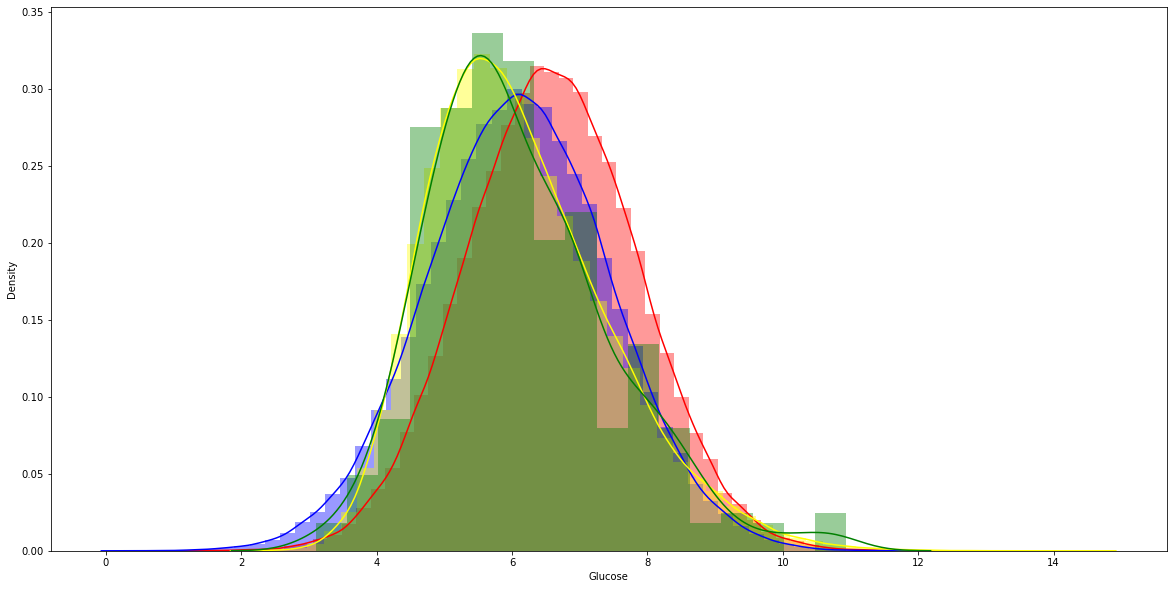

In [33]:
#Plot all the distributions together. 
sns.distplot(norms.rvs(size=100000), color="red")
sns.distplot(norm.rvs(size=100000), color="blue")
sns.distplot(snormFit.rvs(size=100000), color="yellow")
sns.distplot(d_neg["Glucose"], color="green")
plt.show()

Once we have an analytical distribution that mirrors our data closely enough, we can use it. Some caveats:

- The more data we have, the more likely we are able to make an accurate model. Generalizing from a small amount of data is more risky. 

- The closer the distribution is to the distribution you pick, the better. Many are normal, but not all. 

- Does our sample realistically match the population we are modelling? For us, this data comes from a glucose tolerance test, which is one way that doctors diagnose diabetes. You're given a glass of orange juice, then your blood sugar is measured 2 hours later. If it is really high, you're probably diabetic. Most people who have no medical issues wouldn't do this, so we probably should expect our data to be different than the total population. 

一旦我们有一个足够反映我们数据的分析性分布，我们就可以使用它。一些注意事项。

- 我们拥有的数据越多，我们就越有可能做出一个准确的模型。从少量的数据中进行归纳，风险更大。

- 分布越接近你所选的分布，就越好。许多人是正常的，但不是所有的。

- 我们的样本是否与我们所建模的人群真实地匹配？对我们来说，这些数据来自葡萄糖耐量试验，这是医生诊断糖尿病的一种方法。给你一杯橙汁，然后2小时后测量你的血糖。如果它真的很高，你可能是糖尿病患者。大多数没有医疗问题的人不会这样做，所以我们可能应该预期我们的数据会与总人口不同。

In [34]:
#How many people have a blood glucose in an optimal range (3.9-5.4)
low = 3.9
high = 5.4

cdfNeg = thinkstats2.Cdf(d_neg["Glucose"])

print("Normal Distribution:", norm.cdf(high)-norm.cdf(low))
print("Skew Distribution:", norms.cdf(high)-norms.cdf(low))
print("Fitted Distribution:", snormFit.cdf(high)-snormFit.cdf(low))
print("Fitted Distribution:", cdfNeg.Prob(high)-cdfNeg.Prob(low))

Normal Distribution: 0.24937189383105512
Skew Distribution: 0.15757668143726933
Fitted Distribution: 0.30902025021684254
Fitted Distribution: 0.3098591549295775


后面看11 课堂版

#### Part 6: Dead Pancreas Society

Enough with the normies, we can go back to looking at diabetics.

For people with diabetes, inspect for correlations. 

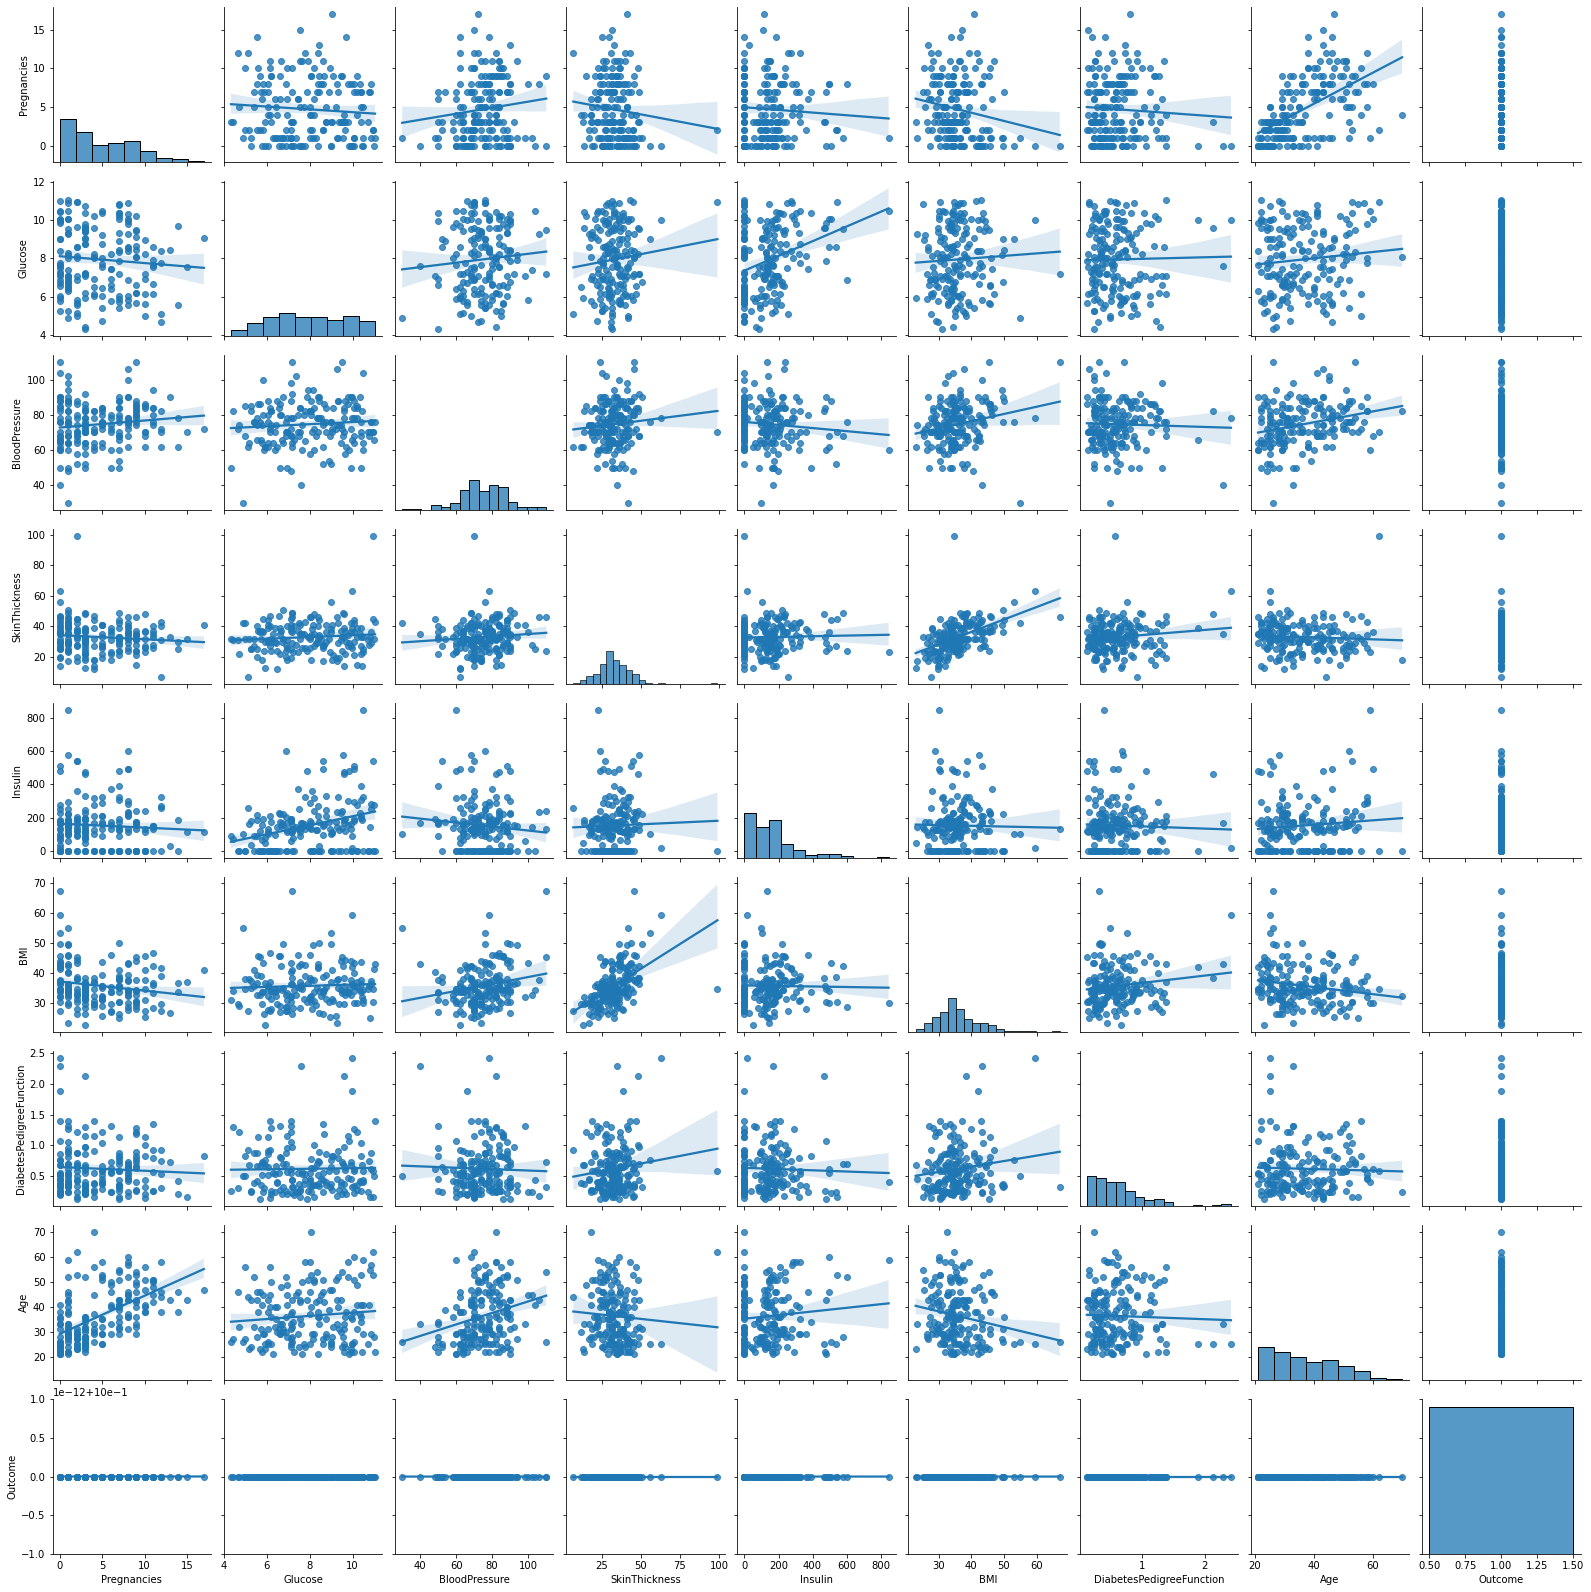

In [35]:
#Take diabetic people and look for correlations
d_pos = d[d["Outcome"] == 1]
sns.pairplot(d_pos, dropna=True, kind="reg")
plt.show()

In [36]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d_pos["BMI"], d_pos["SkinThickness"]), thinkstats2.SpearmanCorr(d_pos["BMI"], d_pos["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d_pos["Glucose"], d_pos["Insulin"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d_pos["Glucose"], d_pos["BloodPressure"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["BloodPressure"]))

BMI-SkinThickness: 0.5173181432909127 0.5631067788957849
Glucose-Insulin: 0.32261570583061316 0.30835176079988386
Glucose-BP: 0.08387629356042059 0.059170274306849506


#### Part 7: Correlation Matrix for Diabetics. 

In [37]:
#Create correlation dataframe
tmp = d_pos.drop(columns=["Outcome"])
posCor = tmp.corr()
posCor.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000 -0.080580       0.125040      -0.101702 -0.064018   
Glucose          -0.080580  1.000000       0.083876       0.095935  0.322616   
BloodPressure     0.125040  0.083876       1.000000       0.094917 -0.102904   
SkinThickness    -0.101702  0.095935       0.094917       1.000000  0.030456   
Insulin          -0.064018  0.322616      -0.102904       0.030456  1.000000   

                    BMI  DiabetesPedigreeFunction       Age  
Pregnancies   -0.179583                 -0.060414  0.553959  
Glucose        0.049547                  0.018666  0.102380  
BloodPressure  0.217539                 -0.035633  0.267244  
SkinThickness  0.517318                  0.129383 -0.066038  
Insulin       -0.019954                 -0.036761  0.098184

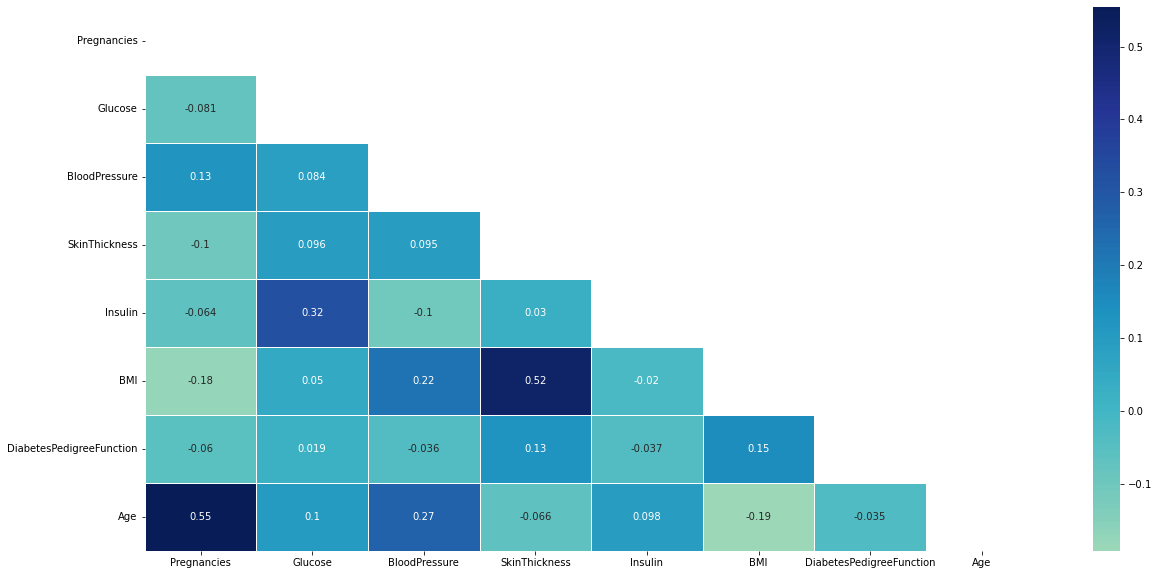

In [38]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor, dtype=bool))
sns.heatmap(posCor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

#### Part 8: Segregate Insulin Havers 

One last thing that jumps out - the insulin column. If you are (type 1 fully) diabetic, you may have no insulin in your system. If you're type 2, you'd expect insulin to skyrocket. What if we split the data along that line?

#### 第 8 部分：隔离胰岛素持有者

最后一件事——胰岛素柱。如果您是（完全 1 型）糖尿病患者，您的系统中可能没有胰岛素。如果你是 2 型，你会期望胰岛素飙升。如果我们沿着这条线分割数据呢？

e:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


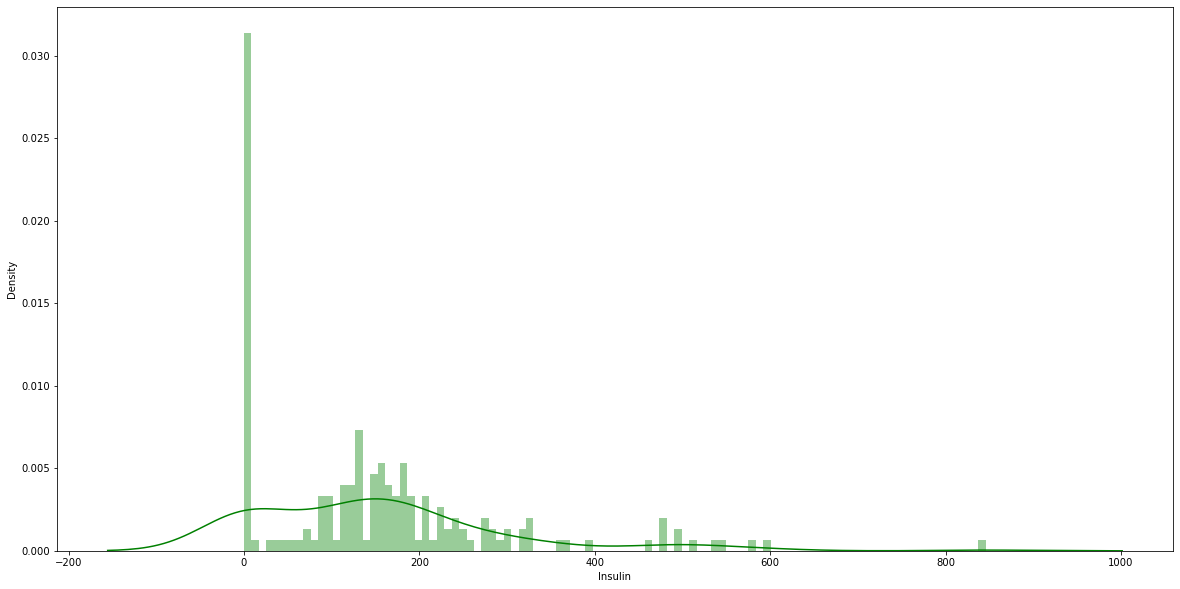

In [39]:
#Look for correlations
sns.distplot(d_pos["Insulin"], color="green", bins=100)
plt.show()

In [40]:
#Split into two groups. 
d_pos["HaveIns"] = (d_pos["Insulin"] > 50)
d_pos.head()

C:\Users\aadqy\AppData\Local\Temp\ipykernel_20904\2105161265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_pos["HaveIns"] = (d_pos["Insulin"] > 50)


Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6   8.214008             72             35        0  33.6   
4             0   7.603508             40             35      168  43.1   
6             3   4.329004             50             32       88  31.0   
8             2  10.933511             70             45      543  30.5   
13            1  10.489510             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  HaveIns  
0                      0.627   50        1    False  
4                      2.288   33        1     True  
6                      0.248   26        1     True  
8                      0.158   53        1     True  
13                     0.398   59        1     True

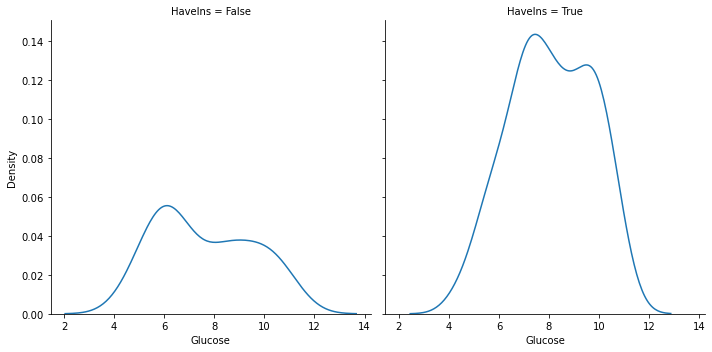

In [41]:
#Look at glucose for both
sns.displot(data=d_pos, x="Glucose", kind="kde", col="HaveIns")

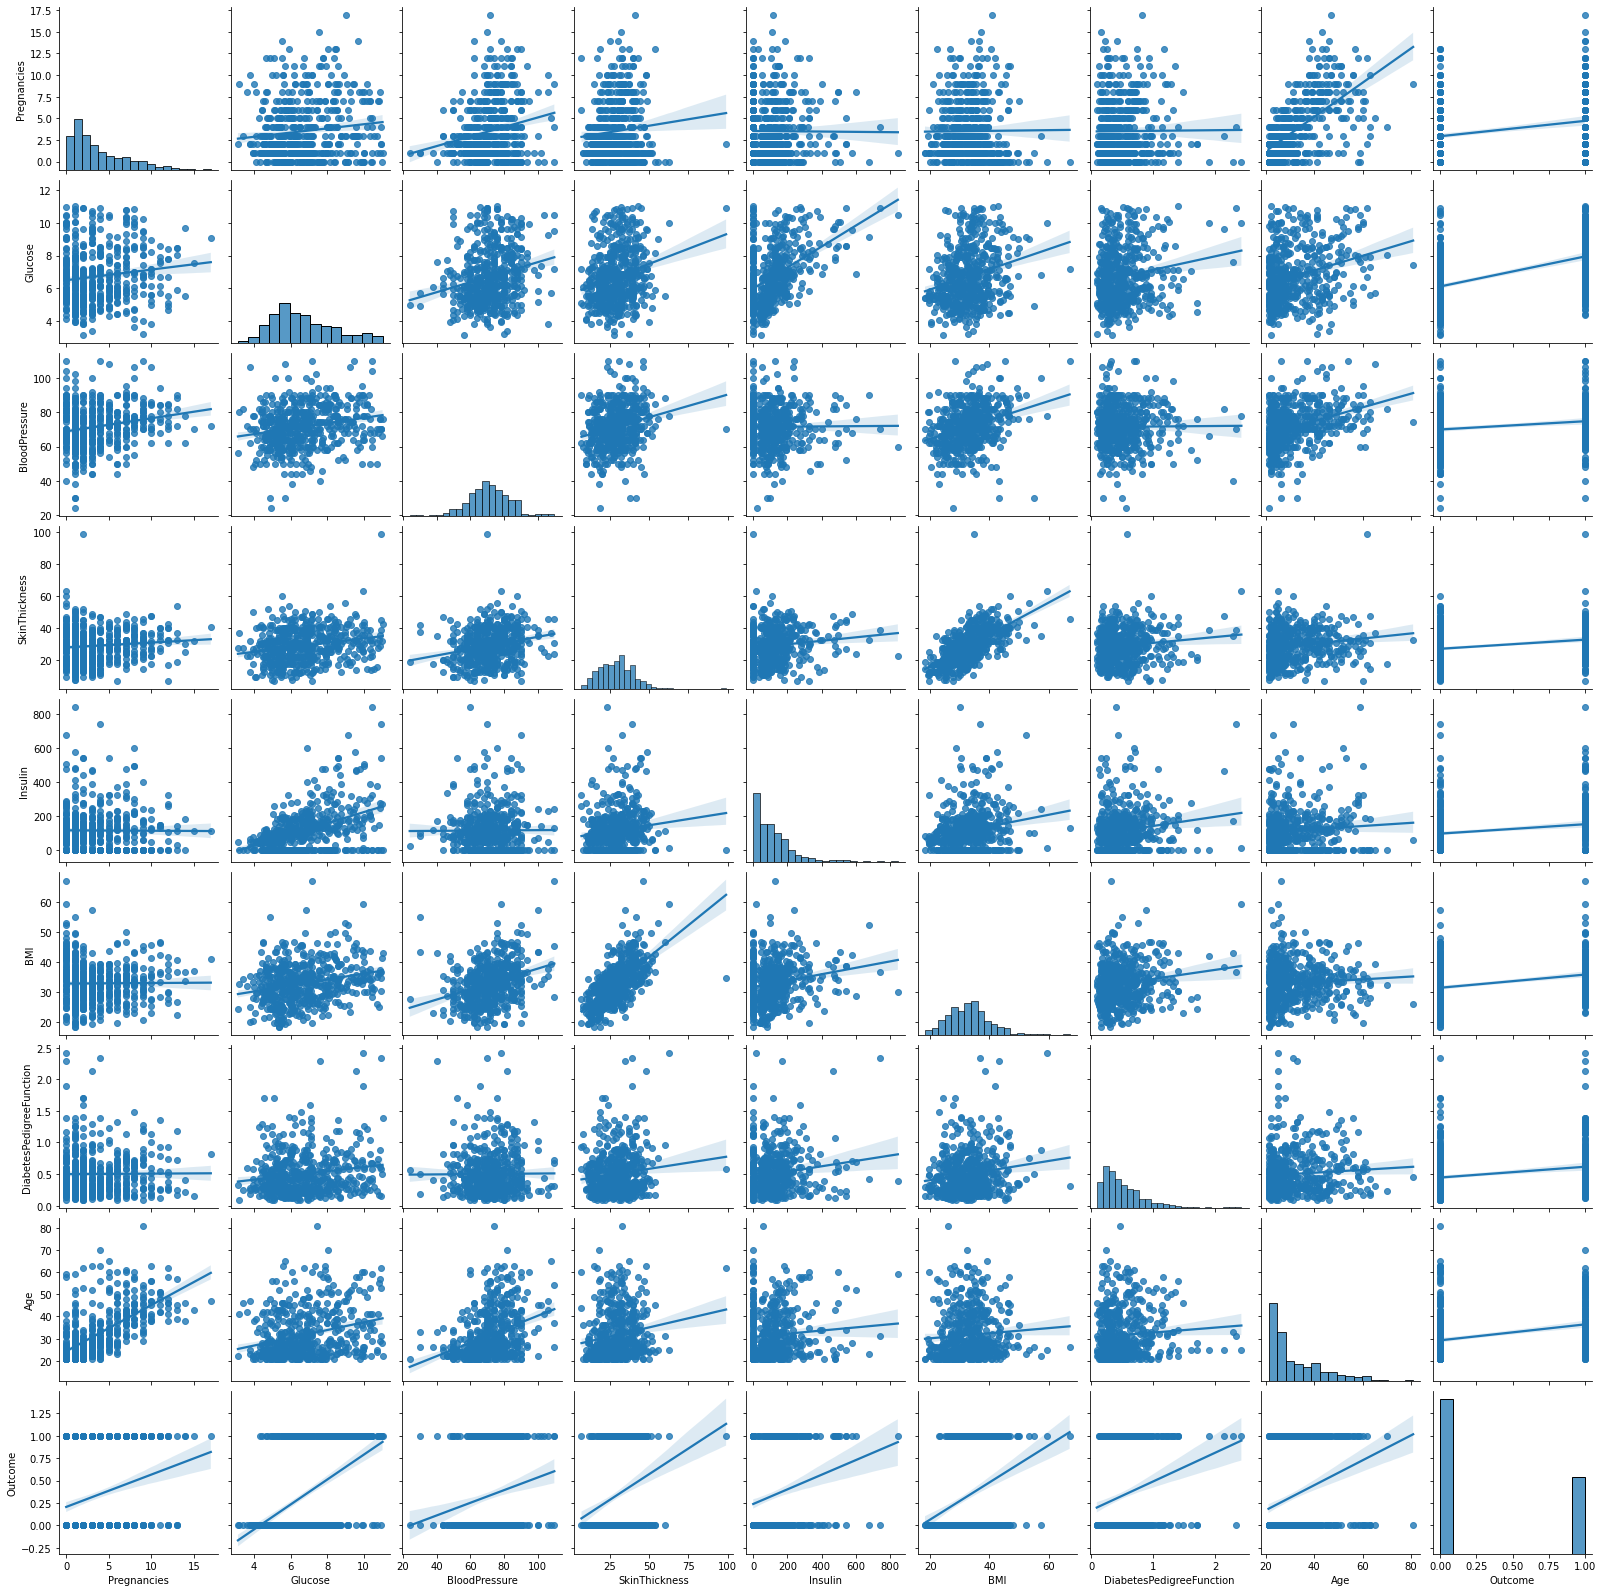

In [42]:
#Plot Insulin-y people for correlations. 
sns.pairplot(d, dropna=True, kind="reg")
 
plt.show()